# Imports

In this section, we import the necessary libraries and modules.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

# Cross Validation

In this section we check that the outputs of GraphX are the same with the outputs of Flink.

## Degree Centrality

In [2]:
# Open the first file and read the combinations of vertex, degree value into a set
with open('../workspace-graphx/outputs/degreeCentrality.txt', 'r') as file1:
    set1 = set(line.strip() for line in file1)

# Open the second file and read the combinations of vertex, degree value into a set
with open('../workspace-flink/outputs/degreeCentrality.txt', 'r') as file2:
    set2 = set(line.strip() for line in file2)

# Check if the two sets contain the same degree values for each vertex
if set1 == set2:
    print("The two files contain the same degree values for each vertex.")
else:
    print("The two files do not contain the same degree values for each vertex.")

The two files contain the same degree values for each vertex.


## Shortest Paths

In [3]:
# Open the first file and read the combinations of vertex, shorest path length into a set
shortest1 = pd.read_csv('../workspace-graphx/outputs/shortestPaths.txt', sep=" ", header=None)

# Open the second file and read the combinations of vertex, shorest path length into a set
shortest2 = pd.read_csv('../workspace-flink/outputs/shortestPaths.txt', sep=" ", header=None)

# Keep only the vertexes that are reachable from the source vertex
shortest1 = shortest1[shortest1[1] != np.inf]
shortest2 = shortest2[shortest2[1] < 1000000000000]

shortest1 = shortest1.astype(int)
shortest2 = shortest2.astype(int)

# Sort the dataframes by vertex
shortest1 = shortest1.sort_values(by=[0])
shortest2 = shortest2.sort_values(by=[0])

# Reset the index of the dataframes
shortest1 = shortest1.reset_index(drop=True)
shortest2 = shortest2.reset_index(drop=True)

if(shortest1[1].equals(shortest2[1])):
    print("The two files contain the same shortest paths for each reachable vertex.")
else:
    print("The two files do not contain the same shortest paths for each reachable vertex.")

The two files contain the same shortest paths for each reachable vertex.


## Triangle Count

In [4]:
# Open the first file and read the triangle count
with open('../workspace-graphx/outputs/triangleCount.txt', 'r') as file1:
    set1 = set(line.strip() for line in file1)

# Open the second file and read the triangle count
with open('../workspace-flink/outputs/triangleCount.txt', 'r') as file2:
    set2 = set(line.strip() for line in file2)

# Check if the two sets contain the same triangle count
if set1 == set2:
    print("The two files contain the same triangle count.")
else:
    print("The two files do not contain the same triangle count.")

The two files contain the same triangle count.


## Weakly Connected Components

In [5]:
# Open the first file and read the combinations of vertex, component id into a set
with open('../workspace-graphx/outputs/weaklyConnectedComponents.txt', 'r') as file1:
    set1 = set(line.strip() for line in file1)

# Open the second file and read the combinations of vertex, component id into a set
with open('../workspace-flink/outputs/weaklyConnectedComponents.txt', 'r') as file2:
    set2 = set(line.strip() for line in file2)

# Check if the two sets contain the same combinations of vertex, component id
if set1 == set2:
    print("The two files contain the same weakly connected components.")
else:
    print("The two files do not contain the same weakly connected components.")

The two files contain the same weakly connected components.


# Data Analysis

In this section, we perform some analytics on the outputs to validate the results. We will use the GraphX outputs, since both libraries have the same outputs.

## Degree Centrality

In [66]:
# Read the degree centrality output into a dataframe
df = pd.read_csv('../workspace-graphx/outputs/degreeCentrality.txt', sep=" ", header=None)

# Degrees is the second row of the dataframe
degrees = df[1]

# Find max degree
max_degree = max(degrees)
print(f"Max degree: {max_degree}")

# Find average degree
average_degree = sum(degrees) / len(degrees)
print(f"Average degree: {average_degree:.4f}")

Max degree: 6353
Average degree: 11.6592


We can see that both `Max degree` and `Average degree` are in accordance with the values `Maximum degree` and `Average degree` on the [dataset statistics](http://konect.cc/networks/web-Google/).

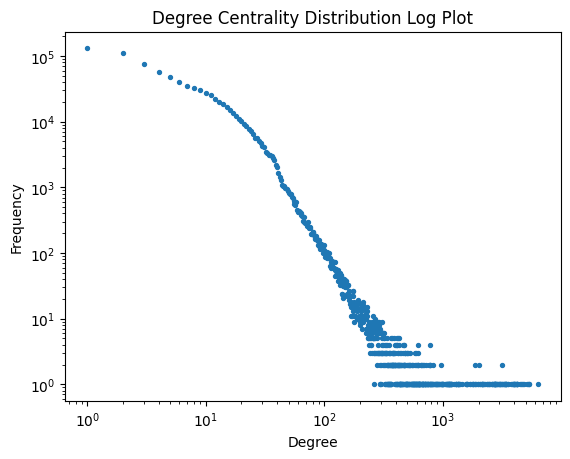

In [52]:
# Get degrees frequencies
dgs, freqs = np.unique(degrees, return_counts=True)

# Plot the degree distribution log plot
plt.scatter(dgs, freqs, s=8)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Centrality Distribution Log Plot")
plt.xscale('log')
plt.yscale('log')
plt.show()

We can see that the `Degree Distribution Log Plot` is in accordance with the [plot](http://konect.cc/plot/degree.a.web-Google.full.png) on the [dataset statistics](http://konect.cc/networks/web-Google/).

## Shortest Paths

In [67]:
# Read the shortest paths output into a dataframe
spaths = pd.read_csv('../workspace-graphx/outputs/shortestPaths.txt', sep=" ", header=None)

# Shortest paths is the second row of the dataframe
spaths = spaths[1]

# Keep only the vertexes that are reachable from the source vertex
spaths = spaths[spaths != np.inf]
print(f"Number of vertexes that are reachable from the source vertex: {spaths.shape[0]}")

# Find max shortest path
max_path = max(spaths)
print(f"Max shortest path: {max_path}")

# Find average shortest path
avg_path = sum(spaths) / len(spaths)
print(f"Average shortest path: {avg_path:.4f}")

Number of vertexes that are reachable from the source vertex: 600493
Max shortest path: 32.0
Average shortest path: 11.2628


For the shortest paths we really do not have any statistics that we can validate against. As a note, we calculated them with a `source vertex` of `0`.

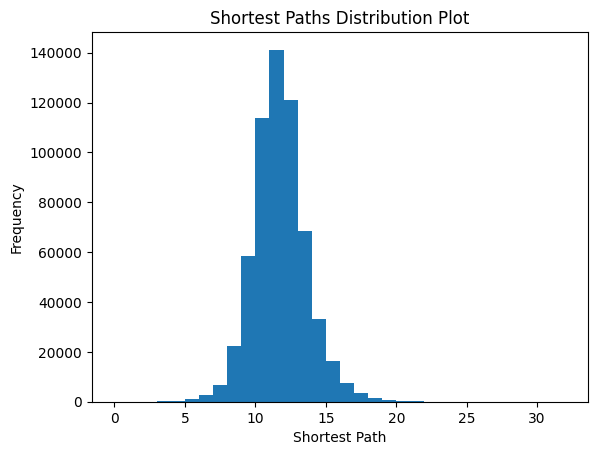

In [51]:
# Get shortest paths frequencies
sps, frequencies = np.unique(spaths, return_counts=True)

# Plot the shortest paths distribution plot
plt.hist(spaths, bins=32)
plt.xlabel("Shortest Path")
plt.ylabel("Frequency")
plt.title("Shortest Paths Distribution Plot")
plt.show()

We can see that the `Shortest Paths Distribution Plot` is in accordance with the value `Average Shortest Path` we calculated above.

## Triangle Count

In [68]:
# Read the triangle count output into a dataframe
triangles = pd.read_csv('../workspace-graphx/outputs/triangleCount.txt', sep=" ", header=None)

print(f"Triangle count: {triangles[0][0]}")

Triangle count: 13391903


We can see that the `Triangle count` is in accordance with the value `Triangle count` on the [dataset statistics](http://konect.cc/networks/web-Google/).

## Weakly Connected Components

In [70]:
# Read the weakly connected components output into a dataframe
wcc = pd.read_csv('../workspace-graphx/outputs/weaklyConnectedComponents.txt', sep=" ", header=None)

# Weakly connected components is the second row of the dataframe
wcc = wcc[1]

# Find number of nodes in largest CC
print(f"Number of nodes in largest WCC: {wcc.value_counts().max()}")

# Find index of largest WCC
print(f"Index of largest WCC: {wcc.value_counts().idxmax()}")

Number of nodes in largest WCC: 855802
Index of largest WCC: 0


We can see that the `Number of nodes in largest WCC` is in accordance with the value `Size of LCC` on the [dataset statistics](https://snap.stanford.edu/data/web-Google.html).

# Time results

In this section, we perform some analytics on the run times.

### Degree Centrality Times

In [79]:
# Read times and seperate them into real, user and sys times in seconds for both GraphX and Flink
real_times = []
user_times = []
sys_times = []

for library in (("graphx", "GraphX", 0, 10), ("flink", "Flink", 10, 20)):
    with open(f"../workspace-{library[0]}/times/degreeCentrality.txt") as f:
        for line in f:
            real_match = re.search(r"real\t(\d+)m(\d+.\d+)s", line)
            if real_match:
                real_time = int(real_match.group(1)) * 60 + float(real_match.group(2))
                real_times.append(real_time)
            
            user_match = re.search(r"user\t(\d+)m(\d+.\d+)s", line)
            if user_match:
                user_time = int(user_match.group(1)) * 60 + float(user_match.group(2))
                user_times.append(user_time)

            sys_match = re.search(r"sys\t(\d+)m(\d+.\d+)s", line)
            if sys_match:
                sys_time = int(sys_match.group(1)) * 60 + float(sys_match.group(2))
                sys_times.append(sys_time)

    print(f"\n- {library[1]}")
    print("Real times:", real_times[library[2]:library[3]])
    print("User times:", user_times[library[2]:library[3]])
    print("Sys times:", sys_times[library[2]:library[3]])


- GraphX
Real times: [34.0, 36.905, 31.356, 34.756, 33.679, 34.411, 29.978, 31.687, 30.177, 32.25]
User times: [21.676, 25.044, 19.816, 23.032, 19.656, 22.732, 19.044, 18.664, 18.616, 18.732]
Sys times: [1.028, 1.052, 1.056, 1.244, 0.94, 1.116, 0.916, 0.924, 0.964, 0.976]

- Flink
Real times: [26.572, 23.812, 26.68, 29.377, 24.36, 24.289, 26.23, 25.231, 28.662, 23.598]
User times: [8.448, 6.748, 8.484, 9.028, 8.484, 7.78, 8.52, 7.488, 8.376, 6.244]
Sys times: [0.532, 0.376, 0.64, 0.932, 0.508, 0.424, 0.836, 0.628, 0.768, 0.576]
